# Practical Work 6 - Recurrent Neural Network

## Introduction

Main goal: build a simple RNN for timeseries prediction. This model will be compared with other models in the next practical lecture.

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import RMSprop

import warnings
warnings.filterwarnings("ignore")

# Data
[Data](https://www.kaggle.com/selfishgene/historical-hourly-weather-data) are weather related measures collected between 2012 et 2017 in 36 towns (1 measure per hour)

Choose a data set to process and set the corresponding variables (you can choose multiple ones, but the training time will be 
longer)

In [238]:
ts = "Temperature"
data = pd.read_csv("/content/drive/MyDrive/Colab-Notebooks/Deep-Learning-Python/05-rnn/temperature.csv")

town='Chicago'
temp = data[['datetime',town]]


In [239]:
data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000,286.180000,284.010000,287.410000,283.850000,294.030000,284.030000,298.170000,288.650000,299.720000,281.000000,286.260000,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636,286.185246,284.054691,287.421360,283.889394,294.035341,284.069789,298.205230,288.650172,299.732518,281.024767,286.262541,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401,286.199194,284.177412,287.454637,283.941919,294.049702,284.173965,298.299595,288.650582,299.766579,281.088319,286.269518,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166,286.213142,284.300133,287.487914,283.994444,294.064063,284.278140,298.393961,288.650991,299.800641,281.151870,286.276496,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


## Data preprocessing
some data is missing: interpolation to fill the missing values

In [240]:
print(temp.isna().sum()[town],"missing data out of",temp.shape[0])
temp.interpolate(inplace=True)
temp.dropna(inplace=True)


3 missing data out of 45253


## Training set
we extract the first `nb_samples` points for the training set. The rest of the data will serve as a test set, to assess the prediction of the model.


In [241]:
# Feel free to change this value to see the impact
nb_samples = 10000

temp_train = np.array(temp[town][:nb_samples]).ravel()
temp_test = np.array(temp[town][nb_samples:]).ravel()

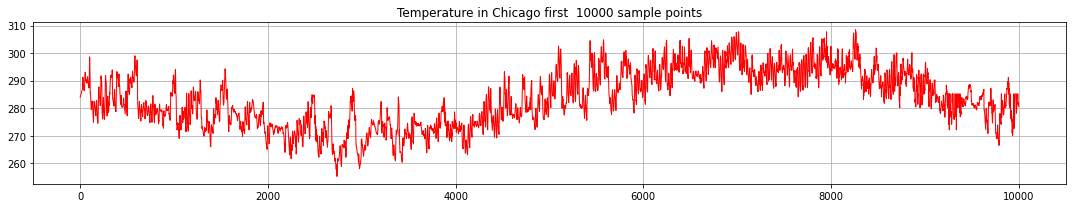

In [242]:
plt.figure(figsize=(15,3))

plt.title(ts +" in {0:s} first  {1:d} sample points".format(town,nb_samples))
plt.grid(True)
plt.plot(temp_train,c='red',lw=1)
plt.tight_layout()

## _Embedding size_
RNN model requires a step value, called the embedding size that contains elements as an input sequence x allowing the prediction of one output value y. If  x = {1,2,3,4,5,6}

- for step=1, x input and its y prediction become:

| x  | y  |
|---|---|
| 1  | 2  |
| 2  | 3  |
| 3  | 4  |
| 4  | 5  |
| 5  | 6  |

- for step=3, x and y contain:

| x  | y  |
|---|---|
| 1,2,3  | 4  |
| 2,3,4  | 5  |
| 3,4,5  | 6  |


In [243]:
# Feel free to change the value to see the impact on the prediction
embedding_size = 16


temp_train = np.append(temp_train,np.repeat(temp_train[-1,],embedding_size))
temp_test = np.append(temp_test,np.repeat(temp_test[-1,],embedding_size))

### Convertion to a suitable format for the model
We convert test and train data into matrices with embedding size value.

In [244]:
def dataMatrix(data, embedding_size):
    X, Y =[], []
    for i in range(len(data)-embedding_size):
        d=i+embedding_size  
        X.append(data[i:d,])
        Y.append(data[d,])
    X=np.array(X)
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    Y=np.array(Y)
    return X,Y

In [245]:
temp_trainX,temp_trainY =dataMatrix(temp_train,embedding_size)
temp_testX,temp_testY =dataMatrix(temp_test,embedding_size)

temp_trainX.shape

(10000, 1, 16)

# Recurrent Neural Network
We use here the already implemented RNN model [(SimpleRNN de Keras)](https://keras.io/layers/recurrent/) . We add a MLP  with only one output unit, to be able to output the predicted value

In [246]:
# RNN parameters
num_units=64
num_dense=16
lr=0.0005

# Model

input_shape = (1,embedding_size)

m = Sequential()

m.add(SimpleRNN(num_units,activation="relu",name="SimpleRNN", input_shape=input_shape))
m.add(Dense(num_dense,activation="relu",name="dense"))
m.add(Dense(1,name="output"))
m.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
SimpleRNN (SimpleRNN)        (None, 64)                5184      
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 6,241
Trainable params: 6,241
Non-trainable params: 0
_________________________________________________________________


Add loss function and optimizer :
- use [mse](https://keras.io/api/losses/regression_losses/) as the loss function
- use [RMSprop](https://keras.io/api/optimizers/rmsprop/) as the optimizer

In [247]:
#TODO

rms = RMSprop(lr=lr)
m.compile(loss="mse", optimizer=rms, metrics=['mse'])

### Fit the model



In [248]:
# Training parameters
batch_size = 16 
num_epochs = 100

In [249]:
#TODO

m.fit(x=temp_trainX, y=temp_trainY, batch_size=batch_size, epochs=num_epochs,verbose=1)

Epoch 1/100
625/625 [==============================] - 3s 3ms/step - loss: 192.6305 - mse: 192.6305
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 35.8605 - mse: 35.8605
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 31.4583 - mse: 31.4583
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 28.0170 - mse: 28.0170
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 25.0012 - mse: 25.0012
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 23.1896 - mse: 23.1896
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 22.7526 - mse: 22.7526
Epoch 8/100
625/625 [==============================] - 2s 3ms/step - loss: 20.3486 - mse: 20.3486
Epoch 9/100
625/625 [==============================] - 2s 3ms/step - loss: 19.4196 - mse: 19.4196
Epoch 10/100
625/625 [==============================] - 2s 3ms/step - loss: 18.8848 - mse: 18.8848
Epoch 11/100
625/

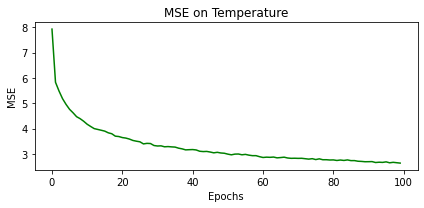

In [250]:

plt.figure(figsize=(6,3))
plt.plot(np.sqrt(m.history.history['loss']),c='green')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE on "+ ts)
plt.tight_layout()


Save model for further processing

In [251]:
m.save_weights("/content/drive/MyDrive/Colab-Notebooks/Deep-Learning-Python/05-rnn/model_"+ts+"temp.h5")


# Predictions


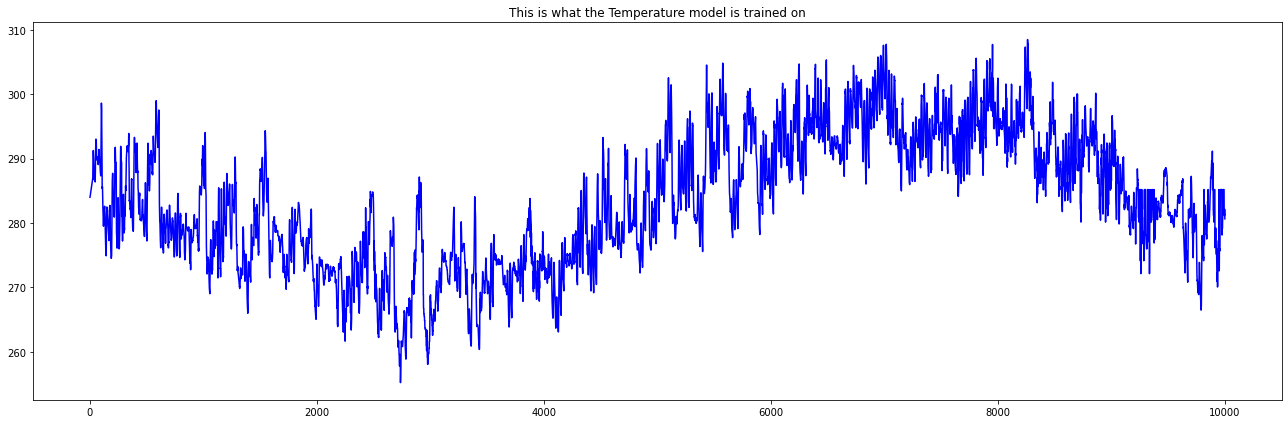

In [252]:
plt.figure(figsize=(18,6))
plt.plot(temp_trainX[:,0][:,0],c='blue')
plt.title("This is what the " + ts + " model is trained on")
plt.tight_layout()

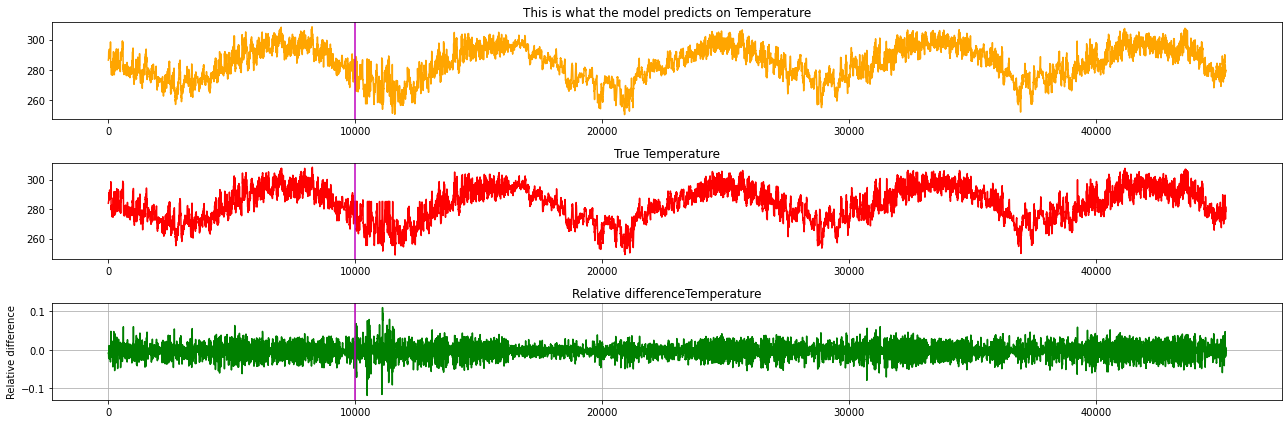

In [253]:
#Compute a array called `predicted`that contains values predicted by the model for the training AND the test set
#TODO
trainPredict = m.predict(temp_trainX)
testPredict = m.predict(temp_testX)
predicted = np.concatenate((trainPredict,testPredict),axis=0)


index = temp.index.values
x = np.array(temp[town]).reshape(-1,1)

plt.figure(figsize=(18,6))

plt.subplot(3,1,1)
plt.plot(index,predicted,c='orange')
plt.title("This is what the model predicts on "+ts)
plt.axvline(x=nb_samples, c="m")

plt.subplot(3,1,2)
plt.plot(index,x,c='r')
plt.title("True "+ts)
plt.axvline(x=nb_samples, c="m")
plt.tight_layout()

# Plot the relative difference between the ground truth and the predicted timeseries.
#TODO

plt.subplot(3,1,3)
plt.title("Relative difference" + ts)
plt.ylabel("Relative difference")
plt.plot(index,(x-predicted)/x, "g")
plt.axvline(x=nb_samples, c="m")
plt.grid(True)
plt.tight_layout()

### Distribution of prediction errors ?


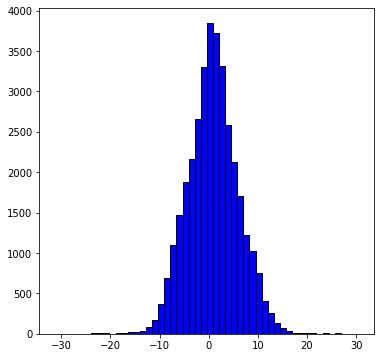

In [254]:
error=predicted[nb_samples:]-x[nb_samples:]
error=np.array(error).ravel()
plt.figure(figsize=(6,6))
plt.hist(error,bins=50,edgecolor='k',color='b')
plt.show()

## Improve the model

To make faster computations, change the model parameters

In [255]:
num_units=256
num_dense=16

### Parameter study
- change `nb_samples`and conclude
- Make the embedding size vary and conclude
- Make the number of epochs change and conclude
- Make the batch size change and conclude

In [256]:
#TODO : I do not put results here, since I want you to experiments and draw your conclusions by your own